In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/shreyaschoudhary/Shopify_Data_Science_Intern_Challenge_2021/main/2019_Winter_Data_Science_Intern_Challenge_Data.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [12]:
#Figuring out the mteric of AOV given in the problem
print("Mean or AOV:", df['order_amount'].mean())

Mean or AOV: 3145.128


Thus, it is established that the measure AOV (Average Order Value) given in the question is that of Mean.

Now, let's investigate, the quantity of shoes in each order.

In [4]:
#Sorting out according to number of orders
df['total_items'].value_counts().sort_index()

1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: total_items, dtype: int64

As seen, the order sizes seem reasonable except for the 17 orders which contain 2000 items. This clearly indicates that the metric of mean used is not a good indicator for the dataset.

In [16]:
#Figuring out the highest order amount
df['order_amount'].value_counts().sort_index()

90        18
94        25
101       15
111       16
112       48
          ..
51450     16
77175      9
102900     1
154350     1
704000    17
Name: order_amount, Length: 258, dtype: int64

We see here that few large orders, mostly above 25000 are driving up the AOV, hence again proving the point that it isn't a suitable metric.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

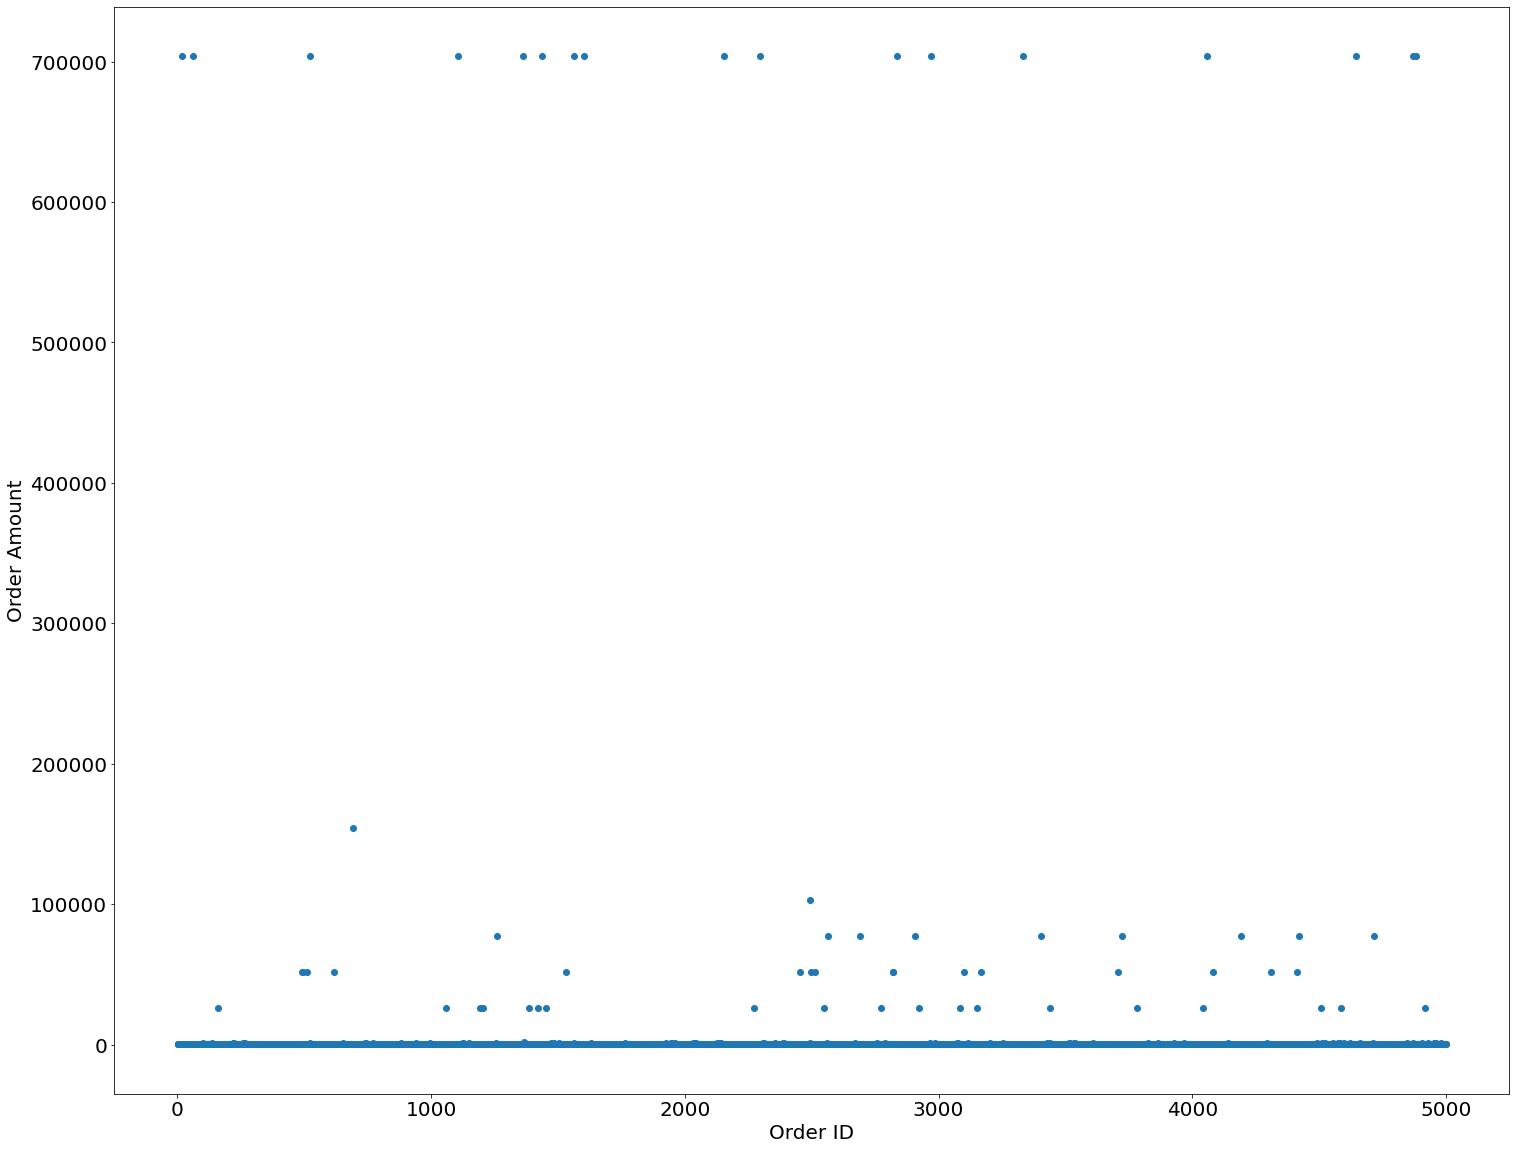

In [6]:
#Visualizing the data for getting better understanding of spread of the data in dataset 
plt.figure(figsize=(25,20))
plt.scatter(x='order_id',y='order_amount',data = df)
plt.xlabel ("Order ID", fontsize = 20)
plt.ylabel ("Order Amount", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

We can see that most of the orders are within the range of 0 to 100000. 

Let us now dive deep into the order amounts above 25000 

In [8]:
#Exploring order amounts above 25000
df_naive = df.loc[(df['order_amount']==25725) | (df['order_amount']==51450) | (df['order_amount']==77175) | (df['order_amount']==102900) | (df['order_amount']==154350) | (df['order_amount']==704000)]
df_naive['shop_id'].value_counts()

78    46
42    17
Name: shop_id, dtype: int64

It is now established that all the large orders with amounts above 25000 originate form two shops with shop_id(s) 78 and 42 respectively. 

In [9]:
#Exploring shop_id 42
df.loc[df['shop_id']==42].sort_values(by=['order_amount'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3651,3652,42,830,352,1,credit_card,2017-03-24 22:26:58
2018,2019,42,739,352,1,debit,2017-03-01 12:42:26
1512,1513,42,946,352,1,debit,2017-03-24 13:35:04
2053,2054,42,951,352,1,debit,2017-03-19 11:49:12
4231,4232,42,962,352,1,cash,2017-03-04 0:01:19
4625,4626,42,809,352,1,credit_card,2017-03-11 8:21:26
3998,3999,42,886,352,1,debit,2017-03-09 20:10:41
979,980,42,744,352,1,debit,2017-03-12 13:09:04
4745,4746,42,872,352,1,debit,2017-03-24 0:57:24
3903,3904,42,975,352,1,debit,2017-03-12 1:28:31


In [10]:
#Exploring shop_id 78
df.loc[df['shop_id']==78].sort_values(by=['order_amount'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
4584,4585,78,997,25725,1,cash,2017-03-25 21:48:44
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
3780,3781,78,889,25725,1,cash,2017-03-11 21:14:50
3440,3441,78,982,25725,1,debit,2017-03-19 19:02:54
3151,3152,78,745,25725,1,credit_card,2017-03-18 13:13:07
3085,3086,78,910,25725,1,cash,2017-03-26 1:59:27
2922,2923,78,740,25725,1,debit,2017-03-12 20:10:58
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00


For shop_id=42, we notice the same time stamp and the number of items ordered on different dates, indicating some sort of bot activity or automised script there. 

For shop_id=78, the number of itme ordered is just a couple at maximum and the order amount seems to be disproportionate, which could be an error. 

Keeping this analysis in mind, a better metric that can be used would be Median, because it takes the factor of disproportionate distribution into account and also is a measure of the central tendency.

In [13]:
#Better metric for the given dataset
print("Median, more appropriate metric:", df['order_amount'].median())

Median, more appropriate metric: 284.0


# Answers

## Question 1

###1a.
**Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.** 

(i) Instead of computing the average, we must look into the individual orders beofre calculating the AOV.
(ii) There are few data points in the data set that are driving up the AOV, for example the large orders from shop_id 42 and 78.
(iii) A more robust metric which isn't affected by such extreme values would then be appropo=riate for the analysis.
(iv) Some of the data points seem outliers.

###1b.
**What metric would you report for this dataset?**

As stated previously, a robust metric, which would not be affected by extreme values is seen fit for this dataset and analysis. Median is that metric in this case.

###1c.
**What is its value?**

The value of the metric Median is 284. This value makes much more sense for the purchase amount of one shoe.




## Question 2

###2a.
**How many orders were shipped by Speedy Express in total?**

The query is as follows:

SELECT COUNT (DISTINCT ORDERID) AS Count

FROM Orders AS O, Shippers AS SH

WHERE O.ShipperID=SH.ShipperID AND SH.ShipperName="Speedy Express"


**OUTPUT: 54**


###2b. 
**What is the last name of the employee with the most orders?**

The query is as follows:

SELECT E.lastname as Name, COUNT()

FROM Orders AS O, Employees AS E

WHERE O.EmployeeID = E.EmployeeID

GROUP BY O.EmployeeID

ORDER BY COUNT() DESC

LIMIT 1


**OUTPUT: Peacock**


###2c.
**What product was ordered the most by customers in Germany?**

The query is as follows:

SELECT P.ProductID, P.ProductName, SUM(Quantity) AS TotalQuantity

FROM Orders AS O, OrderDetails AS OD, Customers AS C, Products AS P

WHERE C.Country = "Germany" AND OD.OrderID = O.OrderID AND OD.ProductID = P.ProductID AND C.CustomerID = O.CustomerID

GROUP BY P.ProductID

ORDER BY TotalQuantity DESC

LIMIT 1;

**OUTPUT: Boston Crab Meat**

**Product_id= 40 ; Quantity=160**


